In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

### Importing the dataset

In [2]:
#read train and test files
train_file = pd.read_csv('emnist-letters-train.csv')
test_file = pd.read_csv('emnist-letters-test.csv')

### Data Checking

In [3]:
#view first 5 records of train_file
train_file.head()

,23,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test_file.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing

In [5]:
#rename first column as label for both test and train set
train_file.rename(columns={'23':'label'}, inplace=True)
test_file.rename(columns={'1':'label'}, inplace=True)

#check train data
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#check train data
test_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.548,0.549,0.550,0.551,0.552,0.553,0.554,0.555,0.556,0.557
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#list of all digits that are going to be predicted
np.sort(train_file.label.unique())
train_file.head()

,label,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.406,0.407,0.408,0.409,0.410,0.411,0.412,0.413,0.414,0.415
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Splitting the training dataset into training and validation sets 

In [8]:
#define the number of samples for training set and for validation set
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)
num_train,num_validation

(71039, 17759)

In [9]:
#generate training data from train_file
x_train,y_train=train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [10]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [11]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(71039, 784)
(71039,)
(17760, 784)
(17760,)


Label: 1 as a


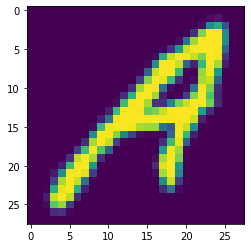

In [26]:
#28 ,28 stands for height and width
index=70
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

print("Label: " + str(y_train[index]) + ' as ' + alphabet[(y_train[index])-1])

#image fixing
image= x_train[index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Training the Random Forest model on the Training set

In [13]:
#fit a Random Forest classifier
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

## Predicting the Validation set results


In [14]:
#predict value of label using classifier
prediction_validation = clf.predict(x_validation)

In [15]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.8725788288288289


Predicted 12 as l


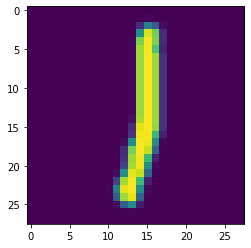

In [16]:
index=75
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print("Predicted " + str(y_validation[y_validation==prediction_validation][index]) + " as " + 
    alphabet[(y_validation[y_validation==prediction_validation][index])-1])

#image fixing
image= x_validation[y_validation==prediction_validation][index]
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Making The Confusion Matrix For Validation set

In [17]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[590   6   0   6   6   1   7  12   0   1   3   0   6  11  15   2  14   1
    0   3   1   1   8   0   0   6]
 [  8 602   0  12   0   3   5   8   1   1   0   1   1   1   6   4   1   3
    1   1   0   0   2   1   1   3]
 [  5   0 662   1  26   1   0   0   0   0   0   1   0   1   5   1   1   2
    0   0   2   0   1   0   0   3]
 [  9  12   0 547   0   0   1   2   2  10   8   4   0   5  27   2   0   1
    0   2   3   3   2   1   1   1]
 [  6   4  21   0 624   4   8   0   1   0   2   0   0   1   4   3   2   8
    0   2   0   1   0   1   0   3]
 [  0   0   3   1   0 609   1   2   1   0   1   3   2   0   0  20   1   1
    1  31   0   1   1   1   0   0]
 [ 12  15   8   7   3   8 466   2   0  17   1   1   5   1   1   5 104   1
    9   4   0   1   0   0   2   4]
 [ 11   3   0   6   0   0   0 574   0   1  17  12   4  26   1   0   1   0
    0   1   7   2   2   3   1   0]
 [  0   0   1   0   0   1   0   0 502  17   2 153   0   0   0   0   0   1
    1   6   0   0   0   

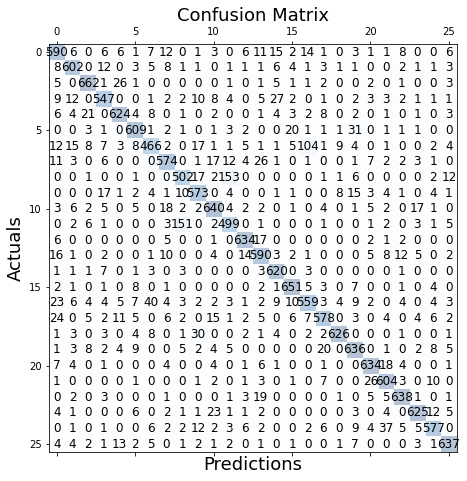

In [18]:
matrix = confusion_matrix(y_validation,prediction_validation)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

## Splitting The Test Dataset

In [19]:
y_test = test_file['label']
test_file=test_file.drop("label", axis=1)
x_test = test_file
x_test.shape , y_test.shape

((14799, 784), (14799,))

## Predicting the Test set results

In [20]:
#predict test data
prediction_test = clf.predict(x_test)
prediction_test.shape

(14799,)

In [21]:
print("Validation Accuracy: " + str(accuracy_score(y_test,prediction_test)))

Validation Accuracy: 0.8576255152375161


Predicted m


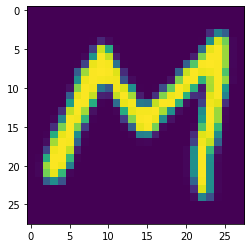

In [22]:
index=10000
alphabet=['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 
          'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
print("Predicted " + alphabet[(prediction_test[index])-1])

#image fixing
image= x_test.iloc[index].values
image = image.reshape([28, 28])
image = np.fliplr(image)
image = np.rot90(image)
plt.imshow(image)

## Making The Confusion Matrix For Test set

In [23]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_test,prediction_test)))

Validation Confusion Matrix: 
[[688   4   4   8   2   5   8  16   0   0   3   1   2   8  10   2  20   4
    0   0   1   0   4   0   0   9]
 [  9 730   0   4   6   1   7  12   0   3   2   3   0   2   5   2   1   3
    1   3   0   0   0   0   0   6]
 [  2   1 731   2  28   0   1   0   1   1   4   4   0   2   7   3   0   6
    1   1   3   0   1   0   0   1]
 [  5  18   1 685   0   1   1   2   1   5   2   0   1   7  47   2   3   1
    0   2   5   3   1   2   0   5]
 [  9   5  23   0 722   3   4   0   0   1   1   2   1   0   7   2   1  10
    0   1   0   0   2   1   0   5]
 [  1   1   1   2   2 712   0   0   4   1   1   4   0   0   0  37   5   2
    2  22   0   0   0   0   2   1]
 [ 25  23  14   7   6  10 534   3   0  12   1   1   0   3   6   4 128   0
   11   3   1   0   1   2   4   1]
 [  9   6   0   6   1   4   0 688   2   0  22   9  10  25   0   0   0   1
    0   1  10   0   4   2   0   0]
 [  0   1   1   2   1   3   1   0 573  14   1 179   1   0   0   0   0   2
    2   3   0   1   1   

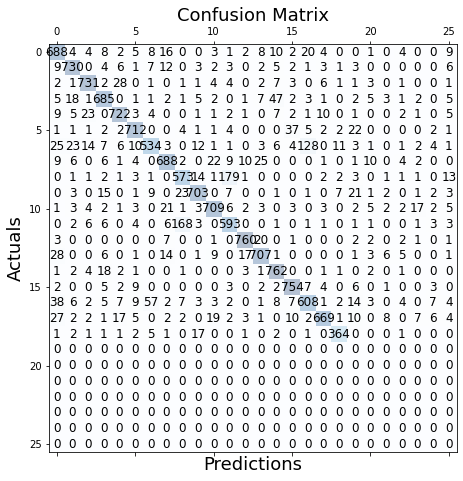

In [24]:
matrix = confusion_matrix(y_test,prediction_test)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j, y=i,s=matrix[i, j], va='center', ha='center', size='larger')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()